# Librerias

In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

from glob import glob
from collections import OrderedDict
from scipy.optimize import least_squares
from scipy.optimize import curve_fit
from lmfit.models import ConstantModel, LorentzianModel

# Funciones

In [ ]:
def Fe_2(x, gA_1, gA_2, gA_3, cA_1, cA_2, cA_3, x0_1,x0_2,x0_3,x0_4,x0_5,x0_6):

    # List_centers=[0,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,741.290168]
    # x0_1=List_centers[2]
    # x0_2=List_centers[4]
    # x0_3=List_centers[6]
    # x0_4=List_centers[8]
    # x0_5=List_centers[9]
    # x0_6=List_centers[10]

    LA_1=(-cA_1/(np.pi*gA_1))/(1+((x-x0_1)/gA_1)**2)
    LA_2=(-cA_2/(np.pi*gA_2))/(1+((x-x0_2)/gA_2)**2)
    LA_3=(-cA_3/(np.pi*gA_3))/(1+((x-x0_3)/gA_3)**2)
    LA_4=(-cA_3/(np.pi*gA_3))/(1+((x-x0_4)/gA_3)**2)
    LA_5=(-cA_2/(np.pi*gA_2))/(1+((x-x0_5)/gA_2)**2)
    LA_6=(-cA_1/(np.pi*gA_1))/(1+((x-x0_6)/gA_1)**2)
    
    sL= LA_1+LA_2+LA_3+LA_4+LA_5+LA_6+1
    
    return sL

def Fe_3(x, gB_1, gB_2, gB_3, cB_1, cB_2, cB_3, x0_1,x0_2,x0_3,x0_4,x0_5,x0_6):

    # List_centers=[0,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,741.290168]
    # x0_1=List_centers[1]
    # x0_2=List_centers[3]
    # x0_3=List_centers[5]
    # x0_4=List_centers[7]
    # x0_5=List_centers[9]
    # x0_6=List_centers[10]

    LB_1=-(cB_1/(np.pi*gB_1))/(1+((x-x0_1)/gB_1)**2)
    LB_2=-(cB_2/(np.pi*gB_2))/(1+((x-x0_2)/gB_2)**2)
    LB_3=-(cB_3/(np.pi*gB_3))/(1+((x-x0_3)/gB_3)**2)
    LB_4=-(cB_3/(np.pi*gB_3))/(1+((x-x0_4)/gB_3)**2)
    LB_5=-(cB_2/(np.pi*gB_2))/(1+((x-x0_5)/gB_2)**2)
    LB_6=-(cB_1/(np.pi*gB_1))/(1+((x-x0_6)/gB_1)**2)
    
    sL= LB_1+LB_2+LB_3+LB_4+LB_5+LB_6+1
    
    return sL

def suma_Lorenzianas(x, gA_1, gA_2, gA_3, gB_1, gB_2, gB_3, cA_1, cA_2, cA_3, cB_1, cB_2, cB_3, x0_1_A,x0_1_B,x0_2_A,x0_2_B,x0_3_A,x0_3_B,x0_4_A,x0_4_B,x0_5_A,x0_5_B,x0_6_A,x0_6_B):
    
    # List_centers=[0,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,648.675212,741.290168,741.290168]
    
    # x0_1_A=List_centers[1]
    # x0_1_B=List_centers[2]

    # x0_2_A=List_centers[3]
    # x0_2_B=List_centers[4]

    # x0_3_A=List_centers[5]
    # x0_3_B=List_centers[6]

    # x0_4_A=List_centers[7]
    # x0_4_B=List_centers[8]

    # x0_5=List_centers[9]
    # x0_6=List_centers[10]

    LA_1=-(cA_1/(np.pi*gA_1))/(1+((x-x0_1_A)/gA_1)**2)
    LA_2=-(cA_2/(np.pi*gA_2))/(1+((x-x0_2_A)/gA_2)**2)
    LA_3=-(cA_3/(np.pi*gA_3))/(1+((x-x0_3_A)/gA_3)**2)
    LA_4=-(cA_3/(np.pi*gA_3))/(1+((x-x0_4_A)/gA_3)**2)

    LB_1=-(cB_1/(np.pi*gB_1))/(1+((x-x0_1_B)/gB_1)**2)
    LB_2=-(cB_2/(np.pi*gB_2))/(1+((x-x0_2_B)/gB_2)**2)
    LB_3=-(cB_3/(np.pi*gB_3))/(1+((x-x0_3_B)/gB_3)**2)
    LB_4=-(cB_3/(np.pi*gB_3))/(1+((x-x0_4_B)/gB_3)**2)

    LA_5=-(cA_2/(np.pi*gA_2))/(1+((x-x0_5_A)/gA_2)**2)
    LA_6=-(cA_1/(np.pi*gA_1))/(1+((x-x0_6_A)/gA_1)**2)
    
    LB_5=-(cB_2/(np.pi*gB_2))/(1+((x-x0_5_B)/gB_2)**2)
    LB_6=-(cB_1/(np.pi*gB_1))/(1+((x-x0_6_B)/gB_1)**2)

    sL=LA_1+LA_2+LA_3+LA_4+LA_5+LA_6+LB_1+LB_2+LB_3+LB_4+LB_5+LB_6+1

    return sL

# Datos

In [ ]:
Rutas=glob('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP2- Mossbauer\Datos - TP2\*.counts')

Fe=pd.read_csv(Rutas[0], header=None, names=['cuentas'])
Mag=pd.read_csv(Rutas[1], header=None, names=['cuentas'])
Ox=pd.read_csv('D:\Genaro\Experimentos Cuanticos II\Exp.-Cuanticos-II\TP2- Mossbauer\Datos - TP2\FeOx_desconocido.aa006.dat',sep='\s+', header=None, names=['Vel', 'Cuentas'])

canales=np.arange(0,2048,1)

Esp_Fe=Fe['cuentas']
Esp_Fe_err=np.sqrt(Esp_Fe)

Esp_Mag=Mag['cuentas']
Esp_Mag_err=np.sqrt(Esp_Mag)

Ox_vel=Ox['Vel']
Ox_Cuentas=Ox['Cuentas']
Ox_Cuentas_err=np.sqrt(Ox_Cuentas)

In [ ]:
List_dif=[]

for j in range(0,100):

    R=(np.array(Esp_Fe[j:1024])-np.flip(np.array(Esp_Fe[1024+j:2048])))**2

    List_dif.append(sum(R))

print(np.nonzero(List_dif==min(List_dif)))

FP=4

Esp_P_Fe=(np.flip(np.array(Esp_Fe[FP:1024]))+np.array(Esp_Fe[1024+FP:2048]))/2
Esp_P_Mag=(np.flip(np.array(Esp_Mag[FP:1024]))+np.array(Esp_Mag[1024+FP:2048]))/2


Esp_P_Mag_norm=Esp_P_Mag/max(Esp_P_Mag)
Esp_P_Fe_norm=Esp_P_Fe/max(Esp_P_Fe)

Canales_P=np.arange(0, len(Esp_P_Fe), 1)

# Analisis

## Calibracion

### Espectro Fe

In [ ]:
velo = Canales_P # Energy or frequency axis
signal = Esp_P_Fe_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_')

# Set initial parameters for the model
params = model.make_params(c=25000, # Background constant
                           p1_center=355, p1_sigma=10, p1_amplitude=-10000, # Peak 1
                           p2_center=420, p2_sigma=10, p2_amplitude=-10000, # Peak 2
                           p3_center=500, p3_sigma=10, p3_amplitude=-10000, # Peak 1
                           p4_center=530, p4_sigma=10, p4_amplitude=-10000, # Peak 2
                           p5_center=600, p5_sigma=10, p5_amplitude=-10000, # Peak 1
                           p6_center=670, p6_sigma=10, p6_amplitude=-10000) # Peak 2

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='Purple')
plt.plot(velo, out.best_fit, label='fit', color='gold')
plt.title('Espectograma Mossbauer - Fe')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Fe.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

In [ ]:
Canales_Fe=np.array([352.397351,417.080822,481.788128,530.632075,595.492759,660.394938])
Canales_Fe_err=np.array([0.02985221,0.03404794,0.05354427,0.05210059,0.03359756,0.02977188])

vel_Fe=[-5.328,-3.084,-0.840,0.840,3.084,5.328]

def lineal(x, p, b):
    
    y=x*p+b

    return y

pop_cal, cov_cal= curve_fit(lineal, Canales_Fe, vel_Fe)

err_cal= np.sqrt(np.diag(cov_cal))

plt.errorbar(Canales_Fe, vel_Fe, xerr=Canales_Fe_err, color='firebrick', fmt='o')
plt.plot(Canales_Fe, lineal(Canales_Fe, *pop_cal), color='navy')

Vel_cal=lineal(Canales_P, *pop_cal)

## Espectro Ox

In [ ]:
Ox_Cuentas_norm=Ox_Cuentas/max(Ox_Cuentas)

velo = Ox_vel # Energy or frequency axis
signal = Ox_Cuentas_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_')

# Set initial parameters for the model
params = model.make_params(c=25000, # Background constant
                           p1_center=-7, p1_sigma=2, p1_amplitude=-3e6, # Peak 1
                           p2_center=-4, p2_sigma=2, p2_amplitude=-3e6, # Peak 2
                           p3_center=-1, p3_sigma=2, p3_amplitude=-3e6, # Peak 1
                           p4_center=2, p4_sigma=2, p4_amplitude=-3e6, # Peak 2
                           p5_center=5, p5_sigma=2, p5_amplitude=-3e6, # Peak 1
                           p6_center=9, p6_sigma=2, p6_amplitude=-3e6) # Peak 2

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='orange')
plt.plot(velo, out.best_fit, label='fit', color='deepskyblue')
plt.title('Espectograma Mossbauer - Oxido Fe')
plt.xlabel('velocidades [mm/s]')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Ox.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

$B=v6-v1 \\
\delta= \frac{v1+v2+v5+v6}{4}\\
\epsilon=\frac{v1+v6-v2-v5}{4}\\
a=\frac{v4-v3}{2B}\\
b=\frac{v5-v2}{2B}\\
\Delta=2*\epsilon$


In [ ]:
center_Ox= [-7.99410922, -4.30304224, -0.81620204, 1.77334151, 5.25709837, 8.52320421]
center_Ox_err=[0.00179633, 0.00208647, 0.00306473, 0.00307986, 0.00212875, 0.00180354]

In [ ]:
B_Ox=center_Ox[5]-center_Ox[0]
delta_Ox=(center_Ox[0]+center_Ox[1]+center_Ox[4]+center_Ox[5])/4
epsilon_Ox=(center_Ox[0]+center_Ox[5]-center_Ox[1]-center_Ox[4])/4
Delta_Ox=2*epsilon_Ox
a_Ox=(center_Ox[4]-center_Ox[1])/(2*B_Ox)
b_Ox=(center_Ox[3]-center_Ox[2])/(2*B_Ox)

print('Campo Hiperfino Oxido: ', B_Ox, '[mm/s]')
print('Corrimiento isomeerico' , delta_Ox, '[mm/s]')
print('Epsilon' , epsilon_Ox, '[mm/s]')
print('Delta' , Delta_Ox, '[mm/s]')
print('a' , a_Ox, '[Ad]')
print('b' , b_Ox, '[Ad]')

## Espectro Mag

### Mag Canales

In [ ]:
velo = Canales_P # Energy or frequency axis
signal = Esp_P_Mag_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_') + LorentzianModel(prefix='p7_') + LorentzianModel(prefix='p8_') + LorentzianModel(prefix='p9_') + LorentzianModel(prefix='p10_') 

# Set initial paerametrs for the model
params = model.make_params(c=1, # Background constant
                           p1_center=280, p1_sigma=10, p1_amplitude=-10000, # Peak 1
                           p2_center=305, p2_sigma=10, p2_amplitude=-10000, # Peak 2
                           p3_center=380, p3_sigma=10, p3_amplitude=-10000, # Peak 3
                           p4_center=400, p4_sigma=10, p4_amplitude=-10000, # Peak 4
                           p5_center=475, p5_sigma=10, p5_amplitude=-10000, # Peak 5
                           p6_center=490, p6_sigma=10, p6_amplitude=-10000, # Peak 6
                           p7_center=550, p7_sigma=10, p7_amplitude=-10000, # Peak 7
                           p8_center=560, p8_sigma=10, p8_amplitude=-10000, # Peak 8
                           p9_center=650, p9_sigma=10, p9_amplitude=-10000, # Peak 9
                           p10_center=740, p10_sigma=10, p10_amplitude=-10000) # Peak 10

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='firebrick')
plt.plot(velo, out.best_fit, label='fit', color='Navy')
plt.title('Espectograma Mossbauer - Mag')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Mag-Canales.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

In [ ]:
picos_Mag=np.array([285.280184 ,311.368597 ,381.695530 ,401.393523 ,478.209392 ,491.512110 ,550.915996 ,559.503618 ,648.675212 ,741.290168])
err_picos_Mag=np.array([0.04940912,0.04908872,0.06754661,0.04596920,0.15649587,0.09847705,0.20367163,0.12923891,0.03469349,0.02559156])
gammas_amps=[3.71135858,5.63721025,3.73751396,4.14555993,3.94680906,4.23503274, 0.37669898,0.71192466,0.27999969,0.48130651,0.13968512,0.24866586,285.280184,311.368597,381.695530,401.393523,478.209392,491.512110,550.915996,559.503618,648.675212,648.675212,741.290168,741.290168]

pop_mags_comp, cov_mags_comp= curve_fit(suma_Lorenzianas, Canales_P, Esp_P_Mag_norm, p0=gammas_amps)

p1=pop_mags_comp[0:3]
c1=pop_mags_comp[6:9]
p2=pop_mags_comp[3:6]
c2=pop_mags_comp[9:12]

centros_1=[pop_mags_comp[12],pop_mags_comp[14],pop_mags_comp[16],pop_mags_comp[18],pop_mags_comp[21],pop_mags_comp[23]]
centros_2=[pop_mags_comp[13],pop_mags_comp[15],pop_mags_comp[17],pop_mags_comp[19],pop_mags_comp[20],pop_mags_comp[22]]

pop_1= np.concatenate((p1, c1, centros_1), axis=None)
pop_2= np.concatenate((p2, c2, centros_2), axis=None)

plt.figure(figsize=(12,8))

plt.errorbar(Canales_P, Esp_P_Mag_norm, fmt='o', color='navy', markersize=2)
plt.plot(Canales_P, suma_Lorenzianas(Canales_P, *pop_mags_comp), color='blue')
plt.plot(Canales_P, Fe_3(Canales_P, *pop_1), color='red',linewidth=2.5)
plt.plot(Canales_P, Fe_2(Canales_P, *pop_2), color='green',linewidth=2.5)
plt.xlabel('Canales', fontsize=26)
plt.ylabel('Cuentas Normalizadas [Au]', fontsize=26)
plt.grid()
plt.legend(fontsize=18)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.savefig('Lorentzianas.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

### Mag velocidades

In [ ]:
velo = Vel_cal # Energy or frequency axis
signal = Esp_P_Mag_norm # Intensity or counts

# Define the model: constant background + Lorentzian peaks
model = ConstantModel() + LorentzianModel(prefix='p1_') + LorentzianModel(prefix='p2_') + LorentzianModel(prefix='p3_') + LorentzianModel(prefix='p4_') + LorentzianModel(prefix='p5_') + LorentzianModel(prefix='p6_') + LorentzianModel(prefix='p7_') + LorentzianModel(prefix='p8_') + LorentzianModel(prefix='p9_') + LorentzianModel(prefix='p10_') 

# Set initial paerametrs for the model
params = model.make_params(c=1, # Background constant
                           p1_center=-7.64356977, p1_sigma=0.16765001, p1_amplitude=-0.01304928, # Peak 1
                           p2_center=-6.75251595, p2_sigma=0.16765001, p2_amplitude=-0.02465114, # Peak 2
                           p3_center=-4.30721053, p3_sigma=0.16765001, p3_amplitude=-0.00969554, # Peak 3
                           p4_center=-3.62978348, p4_sigma=0.14891366, p4_amplitude=-0.01573258, # Peak 4
                           p5_center=-0.97062302, p5_sigma=0.13632109, p5_amplitude=-0.00484151, # Peak 5
                           p6_center=-0.51184352, p6_sigma=0.16765001, p6_amplitude=-0.00836905, # Peak 6
                           p7_center=1.75251595, p7_sigma=0.16765001, p7_amplitude=-0.01573258, # Peak 7
                           p8_center=1.97062302, p8_sigma=0.16765001, p8_amplitude=-1.42914347, # Peak 8
                           p9_center=4.92419343, p9_sigma=0.15680988, p9_amplitude=-0.02535222, # Peak 9
                           p10_center=8.12775672, p10_sigma=0.29600953, p10_amplitude=-1.29763023) # Peak 10

# Fit the model to the data
out = model.fit(signal, params, x=velo)

# Print the fit report
print(out.fit_report())

# Plot the data and the best fit
plt.plot(velo, signal, 'o', label='data', color='firebrick')
plt.plot(velo, out.best_fit, label='fit', color='Navy')
plt.title('Espectograma Mossbauer - Mag')
plt.xlabel('Canales')
plt.ylabel('Cuentas')
plt.legend()

plt.savefig('Mossbauer-Mag-Vel.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

In [ ]:
Vel_Mag=np.array([-7.64444356,-6.74211100,-4.30967793,-3.62837324,-0.97150678,-0.51139611,1.54323329,1.84025637,4.92447855,8.12779940])

In [ ]:
gammas_amps_vel=[0.12836666,0.12927112,0.13650947,0.19497668,0.14338466,0.14647997,-0.01302908,-0.00968448,-0.00483133,-0.02462367,-0.01664720,-0.00860078]
gammas_amps_vel_comp=[0.14353724,0.16974948,0.25157957,0.20859831,0.16952772,0.15141781,0.01434848,0.011111,0.00836135,0.02641949,0.01817241,-0.00860078,-7.64444356,-6.74211100,-4.30967793,-3.62837324,-0.97150678,-0.51139611,1.54323329,1.84025637,4.92447855,4.92447855,8.12779940,8.12779940]

pop_mags_comp_vel, cov_mags_comp= curve_fit(suma_Lorenzianas, Vel_cal, Esp_P_Mag_norm, p0=gammas_amps_vel_comp)

p1_vel=pop_mags_comp_vel[0:3]
c1_vel=pop_mags_comp_vel[6:9]
p2_vel=pop_mags_comp_vel[3:6]
c2_vel=pop_mags_comp_vel[9:12]

centros_1_vel=[pop_mags_comp_vel[12],pop_mags_comp_vel[14],pop_mags_comp_vel[16],pop_mags_comp_vel[18],pop_mags_comp_vel[21],pop_mags_comp_vel[23]]
centros_2_vel=[pop_mags_comp_vel[13],pop_mags_comp_vel[15],pop_mags_comp_vel[17],pop_mags_comp_vel[19],pop_mags_comp_vel[20],pop_mags_comp_vel[22]]

pop_1_vel= np.concatenate((p1_vel, c1_vel, centros_1_vel), axis=None)
pop_2_vel= np.concatenate((p2_vel, c2_vel, centros_2_vel), axis=None)

plt.figure(figsize=(12,8))

plt.errorbar(Vel_cal, Esp_P_Mag_norm, fmt='o', color='navy', markersize=2)
plt.plot(Vel_cal, suma_Lorenzianas(Vel_cal, *pop_mags_comp_vel), color='blue')
plt.plot(Vel_cal, Fe_3(Vel_cal, *pop_1_vel), color='red',linewidth=2.5)
plt.plot(Vel_cal, Fe_2(Vel_cal, *pop_2_vel), color='green',linewidth=2.5)
plt.xlabel('Velocidad [mm/s]')
plt.ylabel('Cuentas Normalizadas [Au]')
plt.grid()
plt.legend(fontsize=18)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

plt.savefig('Lorentzianas_vel.jpg', format='jpg', dpi=1000, bbox_inches='tight')

plt.close()

In [172]:
def Suma_Riemann(dt_x, dt_y, lim_inf, lim_sup):
    
    dif=lim_sup-lim_inf
    rango=range(1,dif)

    suma_inf=0

    for i in rango:

        Delta_x=dt_x[lim_inf+1]-dt_x[lim_inf]

        suma_inf+= dt_y[i]*Delta_x

    return suma_inf

In [171]:
Dt_y_1=-Fe_3(Vel_cal[240:780], *pop_1_vel)+1
len(Dt_y_1)

rango=range(250,780)

rango[0]

250

In [194]:
Dt_y_Fe3=-Fe_3(Vel_cal[0:1020], *pop_1_vel)+1
Dt_y_Fe2=-Fe_2(Vel_cal[0:1020], *pop_2_vel)+1

intFe3=Suma_Riemann(Vel_cal, Dt_y_Fe3, 0,1020)
intFe2=Suma_Riemann(Vel_cal, Dt_y_Fe2, 0,1020)

print('relacion=', intFe3/intFe2)

relacion= 0.6014956947806733


<BarContainer object of 1020 artists>

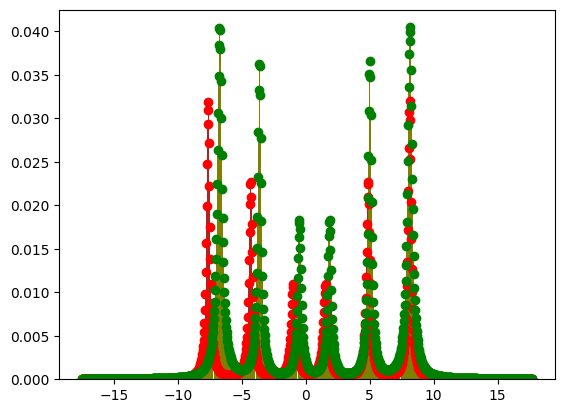

In [195]:
plt.errorbar(Vel_cal, -Fe_3(Vel_cal, *pop_1_vel)+1, color='red', fmt='o')
plt.bar(Vel_cal,-Fe_3(Vel_cal, *pop_1_vel)+1, width=0.034, color='firebrick') 

plt.errorbar(Vel_cal, -Fe_2(Vel_cal, *pop_2_vel)+1, color='green', fmt='o')
plt.bar(Vel_cal,-Fe_2(Vel_cal, *pop_2_vel)+1, width=0.034, color='olive') 